# 講談社「Pythonではじめるベイズ機械学習入門」第3章 回帰モデル

## 3.6 ガウス過程回帰モデル：ガウス尤度

In [1]:
using Distributions
using Plots
using GaussianProcesses

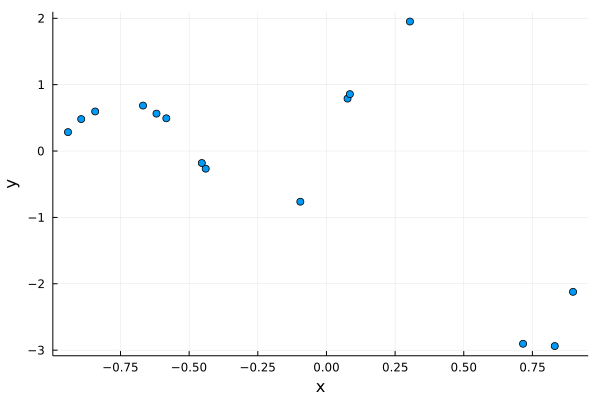

In [2]:
true_func(x) = 1.5 * exp.(x) .* sin.(2 * pi * x)

function generate_train_dataset(N)
    x = rand(Uniform(-1, 1), N)
    y = true_func(x) .+ 0.1 * rand(N)
    return x, y
end

function visualize_train_dataset(x, y)
    p = scatter(x, y, xlabel="x", ylabel="y", label=:none)
    return p
end

N = 15
x_data, y_data = generate_train_dataset(N)
p = visualize_train_dataset(x_data, y_data)

In [3]:
μ = MeanZero()
kernel = SE(1.0, 1.0)
gp = GP(x_data, y_data, μ, kernel)

GP Exact object:
  Dim = 1
  Number of observations = 15
  Mean function:
    Type: MeanZero, Params: Float64[]
  Kernel:
    Type: SEIso{Float64}, Params: [1.0, 1.0]
  Input observations = 
[-0.9412266097194781 -0.6189536645879694 … -0.09513183652275492 -0.4538155087121223]
  Output observations = [0.28493759591695117, 0.5631831471074015, 0.48154103373570506, 1.9507949447436916, 0.7897455110629705, 0.5959322831077546, -2.903902938730699, -0.2661062830285682, 0.49305604679665355, 0.8573318315219134, -2.1215598638980318, 0.6847557065310963, -2.938337000037184, -0.7634713310015664, -0.1806981430599839]
  Variance of observation noise = 0.01831563888873418
  Marginal Log-Likelihood = -325.321

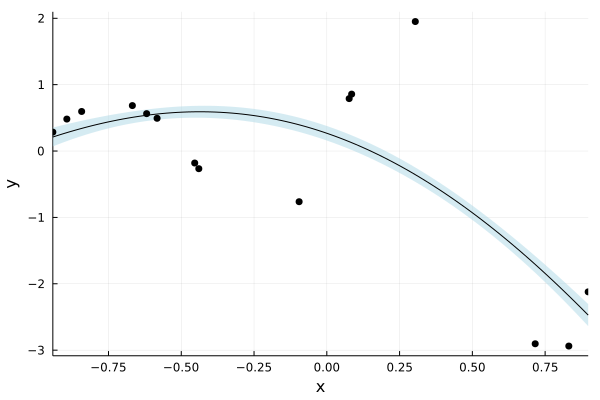

In [5]:
plot(gp; xlabel="x", ylabel="y", legend=:none)

In [9]:
using Optim
optimize!(gp)

 * Status: success

 * Candidate solution
    Final objective value:     2.633941e+00

 * Found with
    Algorithm:     L-BFGS

 * Convergence measures
    |x - x'|               = 0.00e+00 ≤ 0.0e+00
    |x - x'|/|x'|          = 0.00e+00 ≤ 0.0e+00
    |f(x) - f(x')|         = NaN ≰ 0.0e+00
    |f(x) - f(x')|/|f(x')| = NaN ≰ 0.0e+00
    |g(x)|                 = 6.45e-11 ≤ 1.0e-08

 * Work counters
    Seconds run:   0  (vs limit Inf)
    Iterations:    0
    f(x) calls:    1
    ∇f(x) calls:   1


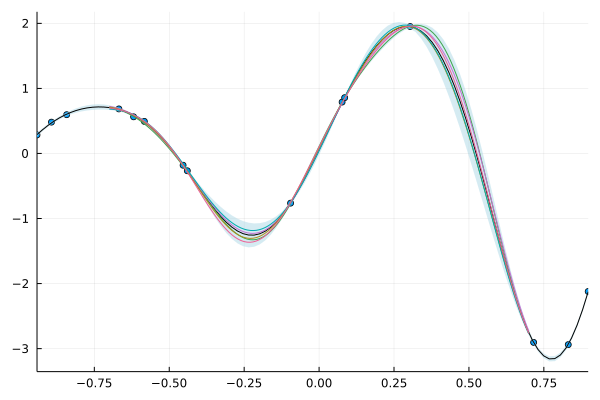

In [10]:
x = -0.7:0.01:0.7
scatter(x_data, y_data, label=:none)
plot!(gp; obsv=false, label=:none, fmt=:png)
samples = rand(gp, x, 5)
plot!(x, samples, label=:none)

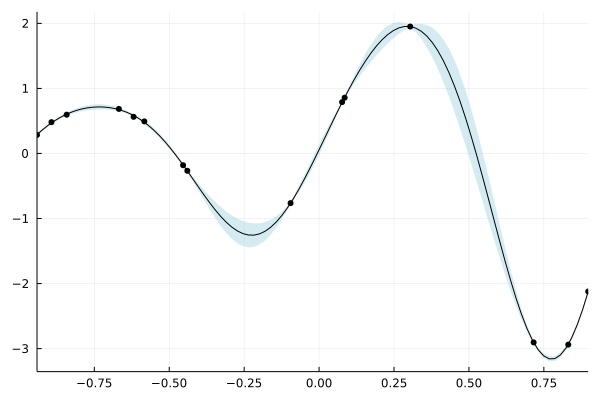

In [11]:
plot(gp; legend=:none, fmt=:png)